<a href="https://colab.research.google.com/github/Viiiin94/ondevice_ai_py/blob/main/AI__exam05_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import seaborn as sns
import pandas as pd
import numpy as np

In [71]:
raw_data = sns.load_dataset('titanic')
print(raw_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [72]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [73]:
raw_data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [74]:
# NaN값이 500개가 넘는 column을 지운다
clean_data = raw_data.dropna(axis=1, thresh=500)
print(clean_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [75]:
# fillna => NaN 값을 채우겠다는 의미 여기서는 평균
clean_data['age'].fillna(clean_data['age'].mean(), inplace=True)
print(clean_data.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


/tmp/ipython-input-3106013105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_data['age'].fillna(clean_data['age'].mean(), inplace=True)
/tmp/ipython-input-3106013105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['age'].fillna(clean_data['age'].mean(), inplace=True)


In [76]:
clean_data.age[:20]

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,29.699118
6,54.000000
7,2.000000
8,27.000000
9,14.000000


In [77]:
# 그냥 column 지움 숫자로 안나오고 중복이라 지움
clean_data.drop(['embark_town', 'alive', 'class'], axis=1, inplace=True, errors='ignore')
print(clean_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'alone'],
      dtype='object')


/tmp/ipython-input-1559981769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(['embark_town', 'alive', 'class'], axis=1, inplace=True, errors='ignore')


In [78]:
# embarked가 NaN이면 이전 값으로 대체한다는 뜻 forward fill 반대는 bfill backward fill
clean_data['embarked'].fillna(method='ffill', inplace=True)
print(clean_data.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
dtype: int64


/tmp/ipython-input-1546600007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_data['embarked'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1546600007.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_data['embarked'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1546600007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [79]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [80]:
# 성별 컬럼에서 male은 0으로 female은 1로
clean_data['sex'].replace({'male': 0, 'female': 1}, inplace=True)
# clean_data의 성별 인덱싱
print(clean_data['sex'].unique())

[0 1]


/tmp/ipython-input-3101941412.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_data['sex'].replace({'male': 0, 'female': 1}, inplace=True)
/tmp/ipython-input-3101941412.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data['sex'].replace({'male': 0, 'female': 1}, inplace=True)
/tmp

In [81]:
# clean_data의 embarked 인덱싱
print(clean_data.embarked.value_counts())

embarked
S    644
C    169
Q     78
Name: count, dtype: int64


In [82]:
from re import L
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
clean_data['embarked'] = encoder.fit_transform(clean_data['embarked'])
print(clean_data['embarked'].value_counts())

# 알파벳 순서대로 인덱싱 처리

embarked
2    644
0    169
1     78
Name: count, dtype: int64


/tmp/ipython-input-3079101160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['embarked'] = encoder.fit_transform(clean_data['embarked'])


In [83]:
print(clean_data.who.value_counts())

who
man      537
woman    271
child     83
Name: count, dtype: int64


In [84]:
clean_data['who'] = encoder.fit_transform(clean_data['who'])
print(clean_data['who'].value_counts())

# 마찬가지로 알파벳 순서대로 인덱싱 처리

who
1    537
2    271
0     83
Name: count, dtype: int64


/tmp/ipython-input-3100999731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['who'] = encoder.fit_transform(clean_data['who'])


In [85]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   who         891 non-null    int64  
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(7)
memory usage: 64.5 KB


In [86]:
# astype은 타입을 변환 adult_male과 alone은 bool에서 int64로 변환
clean_data['adult_male'] = clean_data['adult_male'].astype('int64')
clean_data['alone'] = clean_data['alone'].astype('int64')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   who         891 non-null    int64  
 9   adult_male  891 non-null    int64  
 10  alone       891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


/tmp/ipython-input-2716449621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['adult_male'] = clean_data['adult_male'].astype('int64')
/tmp/ipython-input-2716449621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['alone'] = clean_data['alone'].astype('int64')


In [87]:
target = clean_data[['survived']]
print(type(target))
print(target)

<class 'pandas.core.frame.DataFrame'>
     survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [88]:
traning_data = clean_data.drop(['survived'], axis=1)
traning_data

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,3,0,22.000000,1,0,7.2500,2,1,1,0
1,1,1,38.000000,1,0,71.2833,0,2,0,0
2,3,1,26.000000,0,0,7.9250,2,2,0,1
3,1,1,35.000000,1,0,53.1000,2,2,0,0
4,3,0,35.000000,0,0,8.0500,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,2,1,1,1
887,1,1,19.000000,0,0,30.0000,2,2,0,1
888,3,1,29.699118,1,2,23.4500,2,2,0,0
889,1,0,26.000000,0,0,30.0000,0,1,1,1


In [89]:
value_data = traning_data[['age', 'fare']]
print(value_data.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(value_data)
print(type(scaled_data))
value_data = pd.DataFrame(scaled_data, columns=value_data.columns)
print(value_data.head())
print(type(value_data))

<class 'numpy.ndarray'>
        age      fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337
<class 'pandas.core.frame.DataFrame'>


In [91]:
traning_data.drop(['age', 'fare'], axis=1, inplace=True)
traning_data

,pclass,sex,sibsp,parch,embarked,who,adult_male,alone
0,3,0,1,0,2,1,1,0
1,1,1,1,0,0,2,0,0
2,3,1,0,0,2,2,0,1
3,1,1,1,0,2,2,0,0
4,3,0,0,0,2,1,1,1
...,...,...,...,...,...,...,...,...
886,2,0,0,0,2,1,1,1
887,1,1,0,0,2,2,0,1
888,3,1,1,2,2,2,0,0
889,1,0,0,0,0,1,1,1


In [92]:
# sex가 male이면 0 아니면 1 female이면 1 아니면 0 이런식으로 데이터 처리
onehot_data = pd.get_dummies(traning_data, columns=traning_data.columns)
onehot_data

,pclass_1,pclass_2,pclass_3,sex_0,sex_1,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,embarked_0,embarked_1,embarked_2,who_0,who_1,who_2,adult_male_0,adult_male_1,alone_0,alone_1
0,False,False,True,True,False,False,True,False,False,False,...,False,False,True,False,True,False,False,True,True,False
1,True,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,True,True,False,True,False
2,False,False,True,False,True,True,False,False,False,False,...,False,False,True,False,False,True,True,False,False,True
3,True,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,True,False,True,False
4,False,False,True,True,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,True,False,True,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,True
887,True,False,False,False,True,True,False,False,False,False,...,False,False,True,False,False,True,True,False,False,True
888,False,False,True,False,True,False,True,False,False,False,...,False,False,True,False,False,True,True,False,True,False
889,True,False,False,True,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,False,True


In [93]:
onehot_data = onehot_data.astype('int')
onehot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pclass_1      891 non-null    int64
 1   pclass_2      891 non-null    int64
 2   pclass_3      891 non-null    int64
 3   sex_0         891 non-null    int64
 4   sex_1         891 non-null    int64
 5   sibsp_0       891 non-null    int64
 6   sibsp_1       891 non-null    int64
 7   sibsp_2       891 non-null    int64
 8   sibsp_3       891 non-null    int64
 9   sibsp_4       891 non-null    int64
 10  sibsp_5       891 non-null    int64
 11  sibsp_8       891 non-null    int64
 12  parch_0       891 non-null    int64
 13  parch_1       891 non-null    int64
 14  parch_2       891 non-null    int64
 15  parch_3       891 non-null    int64
 16  parch_4       891 non-null    int64
 17  parch_5       891 non-null    int64
 18  parch_6       891 non-null    int64
 19  embarked_0    891 non-null   

In [94]:
train_data = pd.concat([onehot_data, value_data], axis=1)
train_data

,pclass_1,pclass_2,pclass_3,sex_0,sex_1,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,embarked_2,who_0,who_1,who_2,adult_male_0,adult_male_1,alone_0,alone_1,age,fare
0,0,0,1,1,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,-0.592481,-0.502445
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0.638789,0.786845
2,0,0,1,0,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,-0.284663,-0.488854
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0.407926,0.420730
4,0,0,1,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0.407926,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,-0.207709,-0.386671
887,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,-0.823344,-0.044381
888,0,0,1,0,1,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0.000000,-0.176263
889,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,-0.284663,-0.044381


In [95]:
# 여기까지가 전처리 과정

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    train_data, target, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 31)
(179, 31)
(712, 1)
(179, 1)


In [96]:
sur = clean_data.loc[clean_data.survived == 1]
sur.mean()

,0
survived,1.000000
pclass,1.950292
sex,0.681287
age,28.549778
sibsp,0.473684
parch,0.464912
fare,48.395408
embarked,1.359649
who,1.456140
adult_male,0.257310


In [97]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [98]:
print(X_train.shape)

(712, 31)


In [99]:
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,057 (1.27 MB)

 Trainable params: 333,057 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
# epochs 학습 횟수를 나타냄 계속 학습시키면 숫자를 바꾸거나 계속 실행하면됨
fit_hist = model.fit(X_train, Y_train,
                     epochs=30,
                     batch_size=64,
                     validation_data=(X_test, Y_test))

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5931 - loss: 0.6393 - val_accuracy: 0.7821 - val_loss: 0.4976
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7755 - loss: 0.4985 - val_accuracy: 0.8101 - val_loss: 0.4922
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8007 - loss: 0.4558 - val_accuracy: 0.7989 - val_loss: 0.4477
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7992 - loss: 0.4462 - val_accuracy: 0.8436 - val_loss: 0.4375
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7989 - loss: 0.4524 - val_accuracy: 0.7933 - val_loss: 0.4542
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8009 - loss: 0.4576 - val_accuracy: 0.8268 - val_loss: 0.4282
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8068 - loss: 0.4365 - val_accuracy: 0.8045 - val_loss: 0.4262
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8374 - loss: 0.3906 - val_accuracy: 0.8380 - v

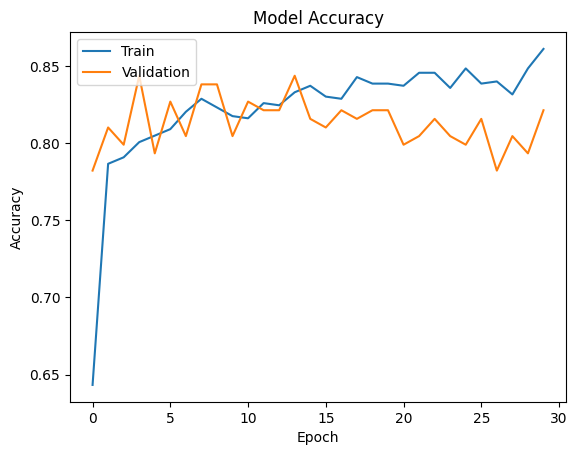

In [101]:
import matplotlib.pyplot as plt
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [103]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8324 - loss: 0.4367 
Test loss: 0.4581097662448883
Test accuracy: 0.8212290406227112
